In [42]:
# Data Set : https://www.kaggle.com/datasets/hellbuoy/car-price-prediction

## Use dropout
## Using R**2 to evaluate the model

import numpy as np
import pandas as pd

df = pd.read_csv('/content/CarPrice_Assignment.csv')
df.sample(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
157,158,0,toyota corolla 1200,gas,std,four,hatchback,fwd,front,95.7,...,98,2bbl,3.19,3.03,9.0,70,4800,30,37,7198.0
100,101,0,nissan nv200,gas,std,four,sedan,fwd,front,97.2,...,120,2bbl,3.33,3.47,8.5,97,5200,27,34,9549.0
180,181,-1,toyota starlet,gas,std,four,sedan,rwd,front,104.5,...,171,mpfi,3.27,3.35,9.2,156,5200,20,24,15690.0
147,148,0,subaru tribeca,gas,std,four,wagon,fwd,front,97.0,...,108,mpfi,3.62,2.64,9.0,94,5200,25,31,10198.0
38,39,0,honda civic 1300,gas,std,two,hatchback,fwd,front,96.5,...,110,1bbl,3.15,3.58,9.0,86,5800,27,33,9095.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
to_drop = ['car_ID', 'symboling', 'CarName']
df = df.drop(to_drop, axis=1)

df.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [8]:
df.columns

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [9]:
df_cat_cols = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']

In [11]:
df_cat = df[['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']]

In [12]:
df_cat

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...
200,gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [14]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder


transformer = make_column_transformer(
    (MinMaxScaler(),
        ['wheelbase', 'carlength', 'carwidth', 'carheight',  'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']),
    (OneHotEncoder(handle_unknown='ignore'), ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'])
)

In [15]:
from sklearn.model_selection import train_test_split


X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [16]:
# Fit
transformer.fit(X_train)

# Apply the transformation
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

In [18]:
X_train

array([[0.63103448, 0.52413793, 0.40952381, ..., 0.        , 0.        ,
        0.        ],
       [0.73448276, 0.72586207, 0.62857143, ..., 1.        , 0.        ,
        0.        ],
       [0.3137931 , 0.43275862, 0.17142857, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.27241379, 0.35689655, 0.19047619, ..., 0.        , 0.        ,
        0.        ],
       [0.56206897, 0.67068966, 0.56190476, ..., 1.        , 0.        ,
        0.        ],
       [0.47586207, 0.68965517, 0.44761905, ..., 1.        , 0.        ,
        0.        ]])

In [20]:
X_test

array([[0.58275862, 0.76551724, 0.48571429, ..., 1.        , 0.        ,
        0.        ],
       [0.44482759, 0.57931034, 0.58095238, ..., 1.        , 0.        ,
        0.        ],
       [0.36551724, 0.49655172, 0.32380952, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.27241379, 0.19482759, 0.17142857, ..., 0.        , 0.        ,
        0.        ],
       [0.32068966, 0.49310345, 0.42857143, ..., 0.        , 1.        ,
        0.        ],
       [0.35862069, 0.49827586, 0.34285714, ..., 0.        , 0.        ,
        0.        ]])

In [19]:
# import numpy as np

# X_train = X_train.toarray()
# X_test = X_test.toarray()

AttributeError: ignored

In [21]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K

In [22]:
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [23]:
tf.random.set_seed(42)

model = Sequential([
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1)
])

model.compile(
    loss=rmse,
    optimizer=Adam(),
    metrics=[rmse]
)

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
6/6 [==============================] - 3s 5ms/step - loss: 15284.1309 - rmse: 15217.5391
Epoch 2/100
6/6 [==============================] - 0s 4ms/step - loss: 15205.5020 - rmse: 15935.0654
Epoch 3/100
6/6 [==============================] - 0s 6ms/step - loss: 15259.7803 - rmse: 14712.6641
Epoch 4/100
6/6 [==============================] - 0s 4ms/step - loss: 15213.1475 - rmse: 14300.4736
Epoch 5/100
6/6 [==============================] - 0s 4ms/step - loss: 15175.6719 - rmse: 14989.7197
Epoch 6/100
6/6 [==============================] - 0s 4ms/step - loss: 15107.9971 - rmse: 14568.7383
Epoch 7/100
6/6 [==============================] - 0s 4ms/step - loss: 14903.1475 - rmse: 13633.7695
Epoch 8/100
6/6 [==============================] - 0s 4ms/step - loss: 14643.7500 - rmse: 13639.4619
Epoch 9/100
6/6 [==============================] - 0s 4ms/step - loss: 14354.0020 - rmse: 15061.5889
Epoch 10/100
6/6 [==============================] - 0s 5ms/step - loss: 13779.1113 - rmse: 

In [24]:
predictions = model.predict(X_test)
predictions[:5]

2/2 [==============================] - 0s 16ms/step


array([[26042.87  ],
       [18635.771 ],
       [10078.725 ],
       [12261.6045],
       [27034.258 ]], dtype=float32)

In [25]:
predictions = np.ravel(predictions)
predictions[:5]

array([26042.87  , 18635.771 , 10078.725 , 12261.6045, 27034.258 ],
      dtype=float32)

In [26]:
rmse(y_test, predictions).numpy()

3421.6312854726307

In [27]:
y_test[]

15     30760.000
9      17859.167
100     9549.000
132    11850.000
68     28248.000
95      7799.000
159     7788.000
162     9258.000
147    10198.000
182     7775.000
191    13295.000
164     8238.000
65     18280.000
175     9988.000
73     40960.000
152     6488.000
18      5151.000
82     12629.000
86      8189.000
143     9960.000
60      8495.000
101    13499.000
98      8249.000
30      6479.000
25      6692.000
16     41315.000
168     9639.000
195    13415.000
97      7999.000
194    12940.000
67     25552.000
120     6229.000
154     7898.000
202    21485.000
79      7689.000
69     28176.000
145    11259.000
55     10945.000
45      8916.500
84     14489.000
146     7463.000
Name: price, dtype: float64

In [28]:
import tensorflow as tf
tf.random.set_seed(42)

In [35]:
initial_model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)
])

initial_model.compile(
    loss=rmse,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[rmse]
)

initial_history = initial_model.fit(
    X_train,
    y_train,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.LearningRateScheduler(
            lambda epoch: 1e-3 * 10 ** (epoch / 30)
        )
    ]
)

Epoch 1/100
6/6 [==============================] - 1s 5ms/step - loss: 15283.8809 - rmse: 15217.3008 - lr: 0.0010
Epoch 2/100
6/6 [==============================] - 0s 5ms/step - loss: 15204.6904 - rmse: 15934.0703 - lr: 0.0011
Epoch 3/100
6/6 [==============================] - 0s 4ms/step - loss: 15255.8154 - rmse: 14708.3018 - lr: 0.0012
Epoch 4/100
6/6 [==============================] - 0s 4ms/step - loss: 15197.0430 - rmse: 14282.7256 - lr: 0.0013
Epoch 5/100
6/6 [==============================] - 0s 5ms/step - loss: 15121.7666 - rmse: 14929.2119 - lr: 0.0014
Epoch 6/100
6/6 [==============================] - 0s 5ms/step - loss: 14949.2227 - rmse: 14393.2979 - lr: 0.0015
Epoch 7/100
6/6 [==============================] - 0s 4ms/step - loss: 14480.4727 - rmse: 13175.4287 - lr: 0.0016
Epoch 8/100
6/6 [==============================] - 0s 5ms/step - loss: 13616.7383 - rmse: 12530.5811 - lr: 0.0017
Epoch 9/100
6/6 [==============================] - 0s 4ms/step - loss: 12107.7695 - rmse

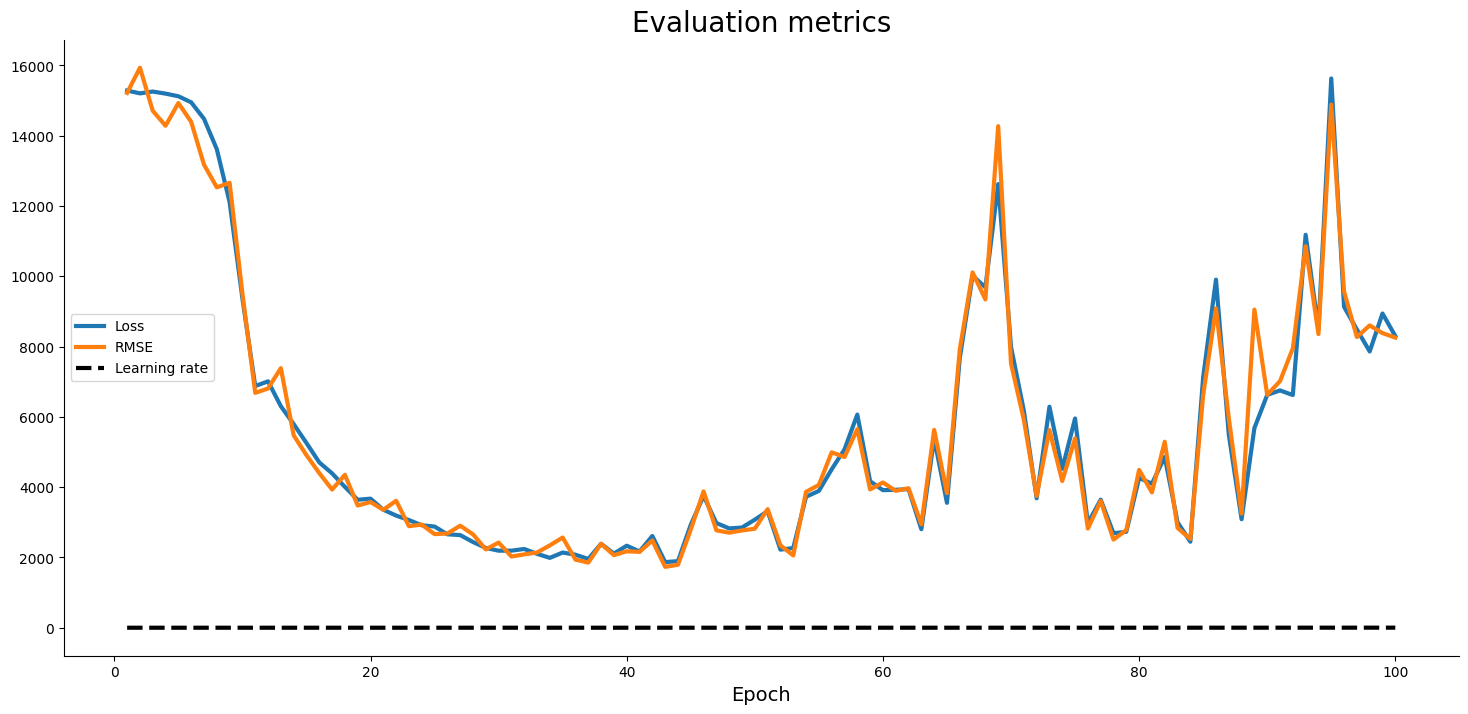

In [36]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

plt.plot(
    np.arange(1, 101),
    initial_history.history['loss'],
    label='Loss', lw=3
)
plt.plot(
    np.arange(1, 101),
    initial_history.history['rmse'],
    label='RMSE', lw=3
)
plt.plot(
    np.arange(1, 101),
    initial_history.history['lr'],
    label='Learning rate', color='#000', lw=3, linestyle='--'
)
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

learning_rates :::  [1.00000000e-02 1.07977516e-02 1.16591440e-02 1.25892541e-02
 1.35935639e-02 1.46779927e-02 1.58489319e-02 1.71132830e-02
 1.84784980e-02 1.99526231e-02 2.15443469e-02 2.32630507e-02
 2.51188643e-02 2.71227258e-02 2.92864456e-02 3.16227766e-02
 3.41454887e-02 3.68694506e-02 3.98107171e-02 4.29866235e-02
 4.64158883e-02 5.01187234e-02 5.41169527e-02 5.84341413e-02
 6.30957344e-02 6.81292069e-02 7.35642254e-02 7.94328235e-02
 8.57695899e-02 9.26118728e-02 1.00000000e-01 1.07977516e-01
 1.16591440e-01 1.25892541e-01 1.35935639e-01 1.46779927e-01
 1.58489319e-01 1.71132830e-01 1.84784980e-01 1.99526231e-01
 2.15443469e-01 2.32630507e-01 2.51188643e-01 2.71227258e-01
 2.92864456e-01 3.16227766e-01 3.41454887e-01 3.68694506e-01
 3.98107171e-01 4.29866235e-01 4.64158883e-01 5.01187234e-01
 5.41169527e-01 5.84341413e-01 6.30957344e-01 6.81292069e-01
 7.35642254e-01 7.94328235e-01 8.57695899e-01 9.26118728e-01
 1.00000000e+00 1.07977516e+00 1.16591440e+00 1.25892541e+00
 1.3

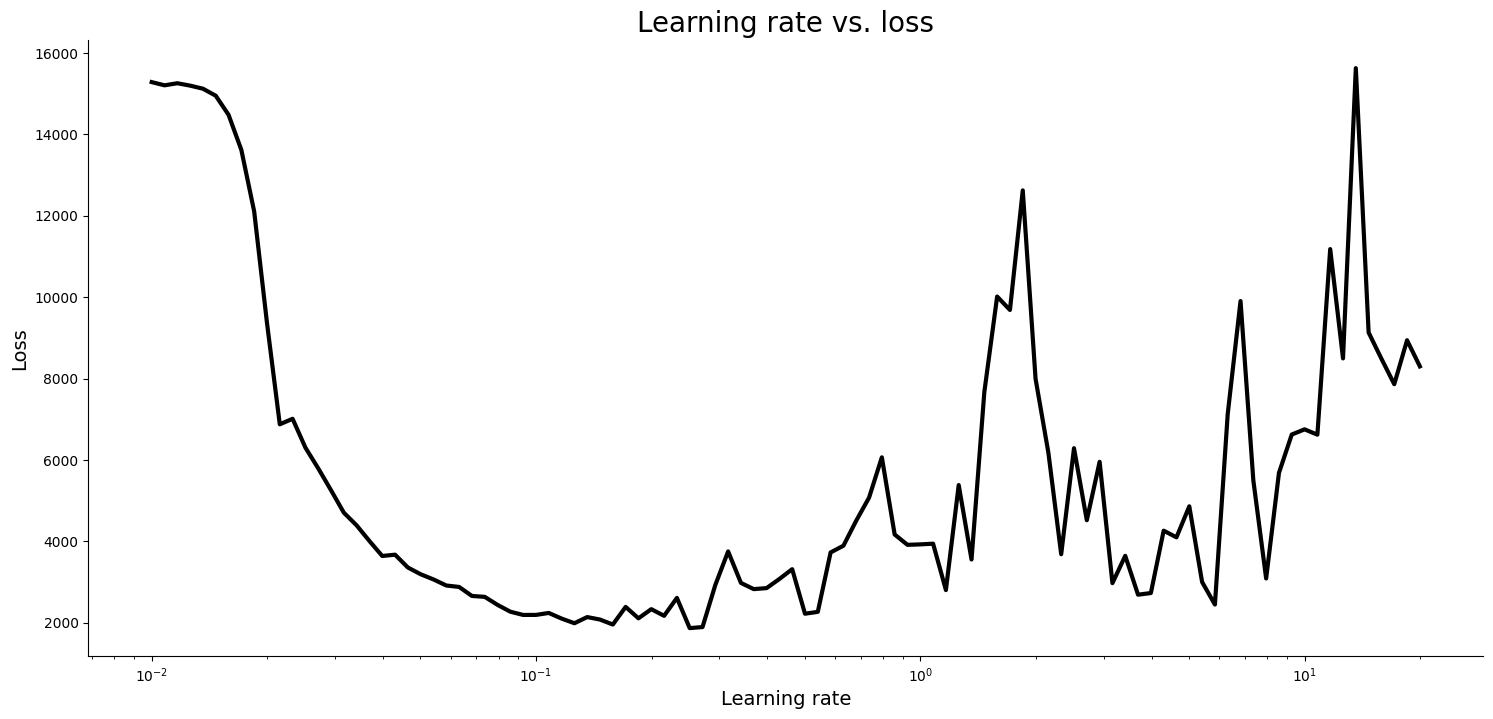

In [38]:
learning_rates = 1e-2 * (10 ** (np.arange(100) / 30))
plt.semilogx(
    learning_rates,
    initial_history.history['loss'],
    lw=3, color='#000'
)
print("learning_rates ::: ", learning_rates)
plt.title('Learning rate vs. loss', size=20)
plt.xlabel('Learning rate', size=14)
plt.ylabel('Loss', size=14);

In [39]:
# with lr = 0.03 , re train the model
model_optimized = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_optimized.compile(
    loss=rmse,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.03),
    metrics=[rmse]
)

history_optimized = model_optimized.fit(
    X_train,
    y_train,
    epochs=100
)

Epoch 1/100
6/6 [==============================] - 1s 6ms/step - loss: 14760.0156 - rmse: 14225.6943
Epoch 2/100
6/6 [==============================] - 0s 7ms/step - loss: 8621.8369 - rmse: 8902.1338
Epoch 3/100
6/6 [==============================] - 0s 7ms/step - loss: 5893.7021 - rmse: 5739.3501
Epoch 4/100
6/6 [==============================] - 0s 7ms/step - loss: 4041.6079 - rmse: 3725.2947
Epoch 5/100
6/6 [==============================] - 0s 9ms/step - loss: 4035.2825 - rmse: 3873.3779
Epoch 6/100
6/6 [==============================] - 0s 7ms/step - loss: 3336.9417 - rmse: 2984.9075
Epoch 7/100
6/6 [==============================] - 0s 7ms/step - loss: 3053.1807 - rmse: 2888.2539
Epoch 8/100
6/6 [==============================] - 0s 9ms/step - loss: 2797.0574 - rmse: 2674.1951
Epoch 9/100
6/6 [==============================] - 0s 9ms/step - loss: 2605.5552 - rmse: 2706.2395
Epoch 10/100
6/6 [==============================] - 0s 8ms/step - loss: 2977.4604 - rmse: 2942.8601
Epoch 1

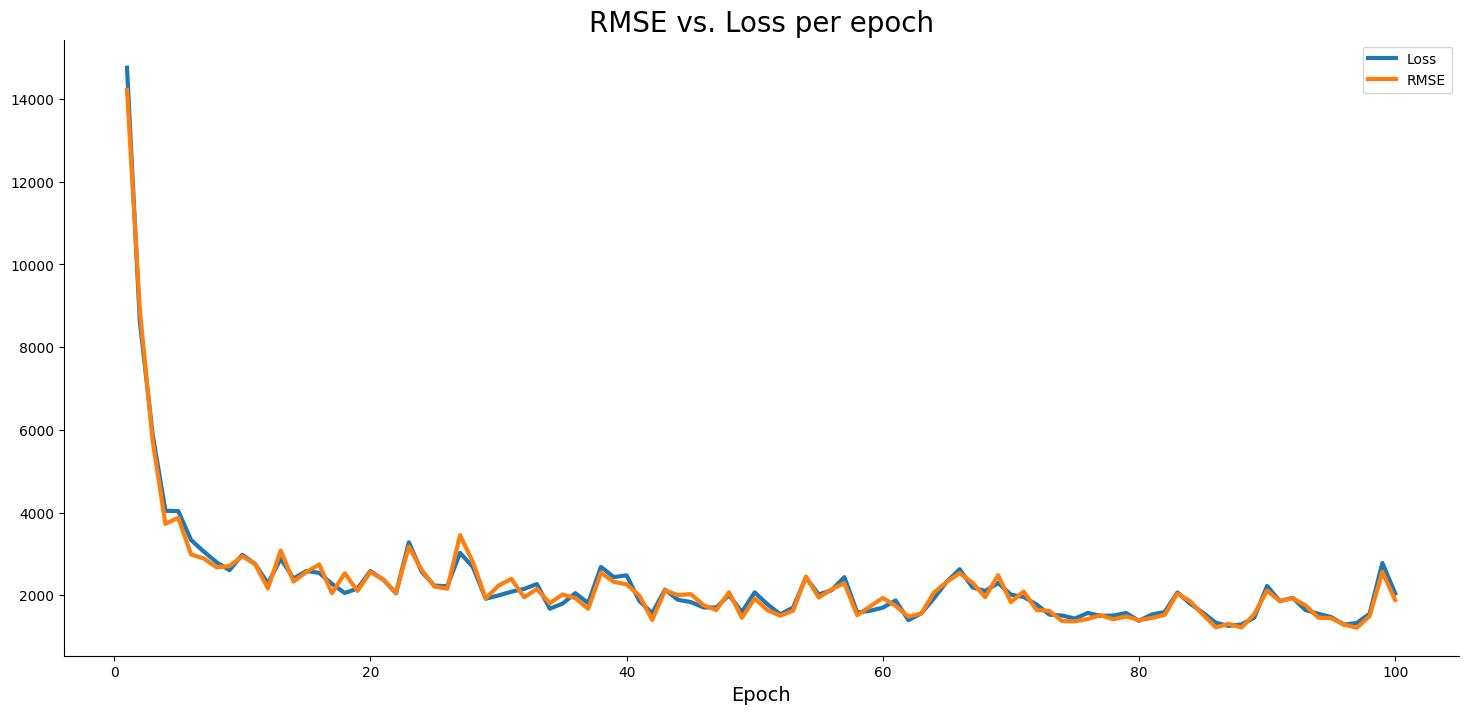

In [40]:
plt.plot(
    np.arange(1, 101),
    history_optimized.history['loss'],
    label='Loss', lw=3
)
plt.plot(
    np.arange(1, 101),
    history_optimized.history['rmse'],
    label='RMSE', lw=3
)
plt.title('RMSE vs. Loss per epoch', size=20)
plt.xlabel('Epoch', size=14)
plt.legend()

In [43]:
from sklearn.metrics import r2_score

In [44]:
r2_score(y_test, predictions)

0.8516979433873516